# Tabular data analysis with `pandas`

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/).

Then install `pandas` and `numpy` by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install -q pandas numpy
```
:::

[Pandas](http://pandas.pydata.org/) is a an open source library providing tabular data structures and data analysis tools.In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job.

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png" width="720px" />

:::{note}
Documentation for this package is available at https://pandas.pydata.org/docs/.
:::

## Package Imports

This will be our first experience with _importing_ a package.

Usually we import `pandas` with the _alias_ `pd`.

We might also need `numpy`, Python's main library for numerical computations.

In [35]:
import pandas as pd
import numpy as np

## Series

A Series represents a one-dimensional array of data. It is similar to a dictionary consisting of an **index** and **values**, but has more functions. 

:::{note}
Example data on Germany's final six nuclear power plants is from [Wikipedia](https://en.wikipedia.org/wiki/List_of_power_stations_in_Germany#Nuclear).
:::

In [36]:
names = ["Neckarwestheim", "Isar 2", "Emsland"]
values = [1269, 1365, 1290]
s = pd.Series(values, index=names)
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

In [37]:
dictionary = {
    "Neckarwestheim": 1269,
    "Isar 2": 1365,
    "Emsland": 1290,
}
s = pd.Series(dictionary)
s

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
dtype: int64

Arithmetic operations can be applied to the whole `pd.Series`.

In [38]:
s**0.5

Neckarwestheim    35.623026
Isar 2            36.945906
Emsland           35.916570
dtype: float64

We can access the underlying index object if we need to:

In [39]:
s.index

Index(['Neckarwestheim', 'Isar 2', 'Emsland'], dtype='object')

We can get values back out using the index via the `.loc` attribute

In [40]:
s.loc["Isar 2"]

1365

Or by raw position using `.iloc`

In [41]:
s.iloc[2]

1290

We can pass a list or array to loc to get multiple rows back:

In [42]:
s.loc[["Neckarwestheim", "Emsland"]]

Neckarwestheim    1269
Emsland           1290
dtype: int64

## DataFrame

Series are limited to a single **column**. A more useful Pandas data structure is the **DataFrame**. A DataFrame is basically a bunch of series that share the same index.

In [43]:
data = {
    "capacity": [1269, 1365, 1290],  # MW
    "type": ["PWR", "PWR", "PWR"],
    "start_year": [1989, 1988, 1988],
    "end_year": [np.nan, np.nan, np.nan],
}
df = pd.DataFrame(data, index=["Neckarwestheim", "Isar 2", "Emsland"])
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


A wide range of statistical functions are available on both Series and DataFrames.

In [44]:
df.min()

capacity      1269
type           PWR
start_year    1988
end_year       NaN
dtype: object

In [45]:
df.mean(numeric_only=True)

capacity      1308.000000
start_year    1988.333333
end_year              NaN
dtype: float64

We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [46]:
df["capacity"]

Neckarwestheim    1269
Isar 2            1365
Emsland           1290
Name: capacity, dtype: int64

Indexing works very similar to series

In [47]:
df.loc["Emsland"]

capacity      1290
type           PWR
start_year    1988
end_year       NaN
Name: Emsland, dtype: object

But we can also specify the column(s) and row(s) we want to access

In [48]:
df.at["Emsland", "start_year"]

1988

We can also add new columns to the DataFrame:

In [49]:
df["reduced_capacity"] = df.capacity * 0.8
df

,capacity,type,start_year,end_year,reduced_capacity
Neckarwestheim,1269,PWR,1989,NaN,1015.2
Isar 2,1365,PWR,1988,NaN,1092.0
Emsland,1290,PWR,1988,NaN,1032.0


We can also remove columns or rows from a DataFrame:

:::{note}
This operation needs to be an **inplace** operation to be permanent.
:::

In [50]:
df.drop("reduced_capacity", axis="columns", inplace=True)

We can also drop columns with only NaN values

In [51]:
df.dropna(axis=1)

,capacity,type,start_year
Neckarwestheim,1269,PWR,1989
Isar 2,1365,PWR,1988
Emsland,1290,PWR,1988


Or fill it up with default "fallback" data:

In [52]:
df.fillna(2023)

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,2023.0
Isar 2,1365,PWR,1988,2023.0
Emsland,1290,PWR,1988,2023.0


## Sorting Data

We can also sort the entries in dataframes, e.g. alphabetically by index or numerically by column values

In [53]:
df.sort_index()

,capacity,type,start_year,end_year
Emsland,1290,PWR,1988,NaN
Isar 2,1365,PWR,1988,NaN
Neckarwestheim,1269,PWR,1989,NaN


In [54]:
df.sort_values(by="capacity", ascending=False)

,capacity,type,start_year,end_year
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN
Neckarwestheim,1269,PWR,1989,NaN


## Filtering Data

We can also filter a DataFrame using a boolean series obtained from a condition. This is very useful to build subsets of the DataFrame.

In [55]:
df.capacity > 1300

Neckarwestheim    False
Isar 2             True
Emsland           False
Name: capacity, dtype: bool

In [56]:
df[df.capacity > 1300]

,capacity,type,start_year,end_year
Isar 2,1365,PWR,1988,NaN


We can also combine multiple conditions, but we need to wrap the conditions with brackets!

In [57]:
df[(df.capacity > 1300) & (df.start_year >= 1988)]

,capacity,type,start_year,end_year
Isar 2,1365,PWR,1988,NaN


Or we make [SQL-like](https://en.wikipedia.org/wiki/SQL) queries:

In [58]:
df.query("start_year == 1988")

,capacity,type,start_year,end_year
Isar 2,1365,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


In [59]:
threshold = 1300
df.query("start_year == 1988 and capacity > @threshold")

,capacity,type,start_year,end_year
Isar 2,1365,PWR,1988,NaN


## Modifying Values

In many cases, we want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [60]:
df.loc["Isar 2", "capacity"] = 1366
df

,capacity,type,start_year,end_year
Neckarwestheim,1269,PWR,1989,NaN
Isar 2,1366,PWR,1988,NaN
Emsland,1290,PWR,1988,NaN


Sometimes it can be useful to rename columns:

In [89]:
df.rename(columns=dict(type="reactor"))

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
id,,,,,,,,,,,,,,,,,,
0,Borssele,Hard Coal,Steam Turbine,PP,Netherlands,485.0,NaN,1973.0,NaN,2034.0,51.4332,3.71600,NaN,0.0,0.0,0.0,{'49W000000000054X'},"{'BEYONDCOAL': {'BEYOND-NL-2'}, 'ENTSOE': {'49..."
1,Flamanville,Nuclear,Steam Turbine,PP,France,2660.0,NaN,1985.0,NaN,2051.0,49.5366,-1.88230,NaN,0.0,0.0,0.0,"{'17W100P100P0210Y', '17W100P100P0209J'}","{'ENTSOE': {'17W100P100P0210Y', '17W100P100P02..."
2,Emsland,Nuclear,Steam Turbine,PP,Germany,1336.0,0.33,1988.0,1988.0,2023.0,52.4716,7.32040,NaN,0.0,0.0,0.0,{'11WD7KKE-1K--KW5'},"{'ENTSOE': {'11WD7KKE-1K--KW5'}, 'GEM': {'G100..."
3,Kernkraftwerk Gosgen,Nuclear,Steam Turbine,PP,Switzerland,1020.0,NaN,1979.0,1979.0,2051.0,47.3656,7.96801,NaN,0.0,0.0,0.0,{'12W-0000000056-1'},"{'ENTSOE': {'12W-0000000056-1'}, 'GEM': {'G100..."
4,Oskarshamn,Nuclear,Steam Turbine,PP,Sweden,1400.0,NaN,1972.0,2006.0,2051.0,57.4166,16.67301,NaN,0.0,0.0,0.0,{'46WPU0000000061P'},"{'ENTSOE': {'46WPU0000000061P'}, 'GEM': {'G100..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23112,Zwolle Solar,Solar,PV,PP,Netherlands,5.2,NaN,2019.0,NaN,NaN,52.5066,6.13770,NaN,0.0,0.0,0.0,{nan},{'GEM': {'G100001008668'}}
23113,Zwolle Solar,Solar,PV,PP,Netherlands,16.3,NaN,2021.0,NaN,NaN,52.4610,6.12300,NaN,0.0,0.0,0.0,{nan},{'GEM': {'G100001008669'}}
23114,Zychlin Kutnowski Solar,Solar,PV,PP,Poland,2.3,NaN,NaN,NaN,NaN,52.2440,19.62610,NaN,0.0,0.0,0.0,{nan},{'GEM': {'G100001007329'}}


Sometimes it can be useful to replace values:

In [62]:
df.replace({"PWR": "Pressurized water reactor"})

,capacity,type,start_year,end_year
Neckarwestheim,1269,Pressurized water reactor,1989,NaN
Isar 2,1366,Pressurized water reactor,1988,NaN
Emsland,1290,Pressurized water reactor,1988,NaN


## Time Series

Time indexes are great when handling time-dependent data.

Let's first read some time series data, using the `pd.read_csv()` function, which takes a local file path ora link to an online resource.

The example data hourly time series for Germany in 2015 for:
    
1. electricity demand from [OPSD](https://open-power-system-data.org/) in GW
2. onshore wind capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
3. offshore wind capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
4. solar PV capacity factors from [renewables.ninja](https://www.renewables.ninja/) in per-unit of installed capacity
5. electricity day-ahead spot market prices in €/MWh from EPEX Spot zone DE/AT/LU retrieved via [SMARD platform](https://www.smard.de/home)

In [96]:
url = "https://tubcloud.tu-berlin.de/s/pKttFadrbTKSJKF/download/time-series-lecture-2.csv"
ts = pd.read_csv(url, index_col=0, parse_dates=True)
ts.head()

,load,onwind,offwind,solar,prices
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,NaN
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,NaN
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,NaN
2015-01-01 03:00:00,38.765,0.1745,0.6803,0.0,NaN
2015-01-01 04:00:00,38.941,0.1826,0.7272,0.0,NaN


We can use Python's _slicing_ notation inside `.loc` to select a date range, and then use the built-in plotting feature of Pandas:

<Axes: >

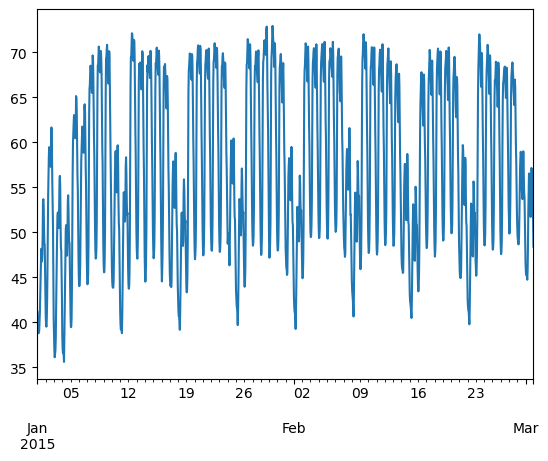

In [103]:
ts.loc["2015-01-01":"2015-03-01", "load"].plot()

<Axes: >

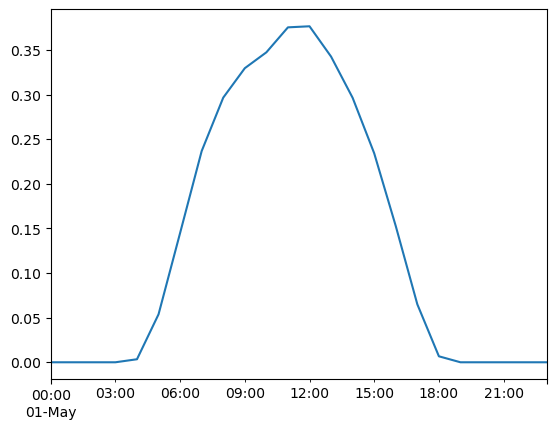

In [104]:
ts.loc["2015-05-01", "solar"].plot()

A common operation is to change the resolution of a dataset by resampling in time, which Pandas exposes through the [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling) function.

:::{note}
The resample periods are specified using pandas [offset index](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) syntax.
:::

<Axes: >

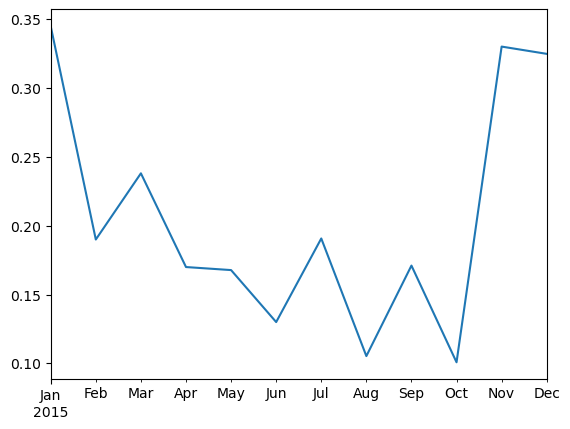

In [105]:
ts["onwind"].resample("ME").mean().plot()

## Groupby Functionality

`DataFrame` objects have a `groupby` method. The simplest way to think about it is that you pass another series, whose values are used to split the original object into different groups.

Here's an example which retrieves the total generation capacity per country:

In [71]:
fn = "https://raw.githubusercontent.com/PyPSA/powerplantmatching/master/powerplants.csv"

In [72]:
df = pd.read_csv(fn, index_col=0)
df.iloc[:5, :10]

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut
id,,,,,,,,,,
0,Borssele,Hard Coal,Steam Turbine,PP,Netherlands,485.0,NaN,1973.0,NaN,2034.0
1,Flamanville,Nuclear,Steam Turbine,PP,France,2660.0,NaN,1985.0,NaN,2051.0
2,Emsland,Nuclear,Steam Turbine,PP,Germany,1336.0,0.33,1988.0,1988.0,2023.0
3,Kernkraftwerk Gosgen,Nuclear,Steam Turbine,PP,Switzerland,1020.0,NaN,1979.0,1979.0,2051.0
4,Oskarshamn,Nuclear,Steam Turbine,PP,Sweden,1400.0,NaN,1972.0,2006.0,2051.0


In [73]:
grouped = df.groupby("Country").Capacity.sum()
grouped.head()

Country
Albania                    2361.708275
Austria                   25458.200368
Belgium                   21426.651009
Bosnia and Herzegovina     4827.195964
Bulgaria                  15699.186363
Name: Capacity, dtype: float64

Let's break apart this operation a bit. The workflow with `groupby` can be divided into three general steps:

1. **Split**: Partition the data into different groups based on some criterion.
2. **Apply**: Do some caclulation within each group, e.g. minimum, maximum, sums.
3. **Combine**: Put the results back together into a single object.

<img src="https://miro.medium.com/max/1840/1*JbF6nhrQsn4f-TaSF6IR9g.png" width="720px" />

Grouping is not only possible on a single columns, but also on multiple columns. For instance,
we might want to group the capacities by country **and** fuel type. To achieve this, we pass a list of functions to the `groupby` functions.

In [74]:
capacities = df.groupby(["Country", "Fueltype"]).Capacity.sum()
capacities

Country         Fueltype     
Albania         Hydro             1743.353732
                Oil                 89.854543
                Solar              294.500000
                Wind               234.000000
Austria         Hard Coal         1331.400000
                                     ...     
United Kingdom  Other               55.000000
                Solar            11668.600000
                Solid Biomass     4919.000000
                Waste              288.900000
                Wind             38670.300000
Name: Capacity, Length: 243, dtype: float64

By grouping by multiple attributes, our index becomes a `pd.MultiIndex` (a hierarchical index with multiple *levels*.

In [75]:
capacities.index[:5]

MultiIndex([('Albania',     'Hydro'),
            ('Albania',       'Oil'),
            ('Albania',     'Solar'),
            ('Albania',      'Wind'),
            ('Austria', 'Hard Coal')],
           names=['Country', 'Fueltype'])

We can use the `.unstack` function to reshape the multi-indexed `pd.Series` into a `pd.DataFrame` which has the second index level as columns. 

In [76]:
capacities.unstack().tail().T

Country,Spain,Sweden,Switzerland,Ukraine,United Kingdom
Fueltype,,,,,
Biogas,NaN,NaN,NaN,NaN,31.000000
Geothermal,NaN,NaN,NaN,NaN,NaN
Hard Coal,11904.878478,291.000000,NaN,23782.495570,33823.617061
Hydro,26069.861248,14273.686625,20123.3008,6599.452229,4576.175000
Lignite,1831.400000,NaN,NaN,NaN,NaN
Natural Gas,28394.244000,2358.000000,55.0000,4687.900000,36284.975440
Nuclear,7733.200000,9859.000000,3355.0000,17635.000000,19181.000000
Oil,1854.371000,1685.000000,NaN,NaN,100.000000
Other,NaN,NaN,NaN,NaN,55.000000


## Exercises

**Task 1:** Provide a list of unique fuel types included in the power plants dataset.

In [78]:
df.Fueltype.unique()

array(['Hard Coal', 'Nuclear', 'Hydro', 'Lignite', 'Natural Gas',
       'Solid Biomass', 'Oil', 'Other', 'Solar', 'Wind', 'Geothermal',
       'Waste', 'Biogas'], dtype=object)

**Task 2:** Filter the dataset by power plants with the fuel type "Hard Coal". How many hard coal power plants are there?

In [80]:
coal = df.loc[df.Fueltype == "Hard Coal"]
coal

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
id,,,,,,,,,,,,,,,,,,
0,Borssele,Hard Coal,Steam Turbine,PP,Netherlands,485.000000,NaN,1973.0,NaN,2034.0,51.433200,3.716000,NaN,0.0,0.0,0.0,{'49W000000000054X'},"{'BEYONDCOAL': {'BEYOND-NL-2'}, 'ENTSOE': {'49..."
26,Mellach,Hard Coal,Steam Turbine,CHP,Austria,200.000000,NaN,1986.0,1986.0,2020.0,46.911700,15.488300,NaN,0.0,0.0,0.0,{'14W-WML-KW-----0'},"{'BEYONDCOAL': {'BEYOND-AT-11'}, 'ENTSOE': {'1..."
136,Bastardo,Hard Coal,Steam Turbine,PP,Italy,138.290543,NaN,1989.0,NaN,2025.0,42.893300,12.539700,NaN,0.0,0.0,0.0,{'26WIMPI-S10BSTRJ'},"{'BEYONDCOAL': {'BEYOND-IT-10'}, 'ENTSOE': {'2..."
137,Brindisi Sud,Hard Coal,Steam Turbine,PP,Italy,1825.435174,NaN,1991.0,NaN,2025.0,40.563900,18.032200,NaN,0.0,0.0,0.0,{'26WIMPI-S16BSCRY'},"{'BEYONDCOAL': {'BEYOND-IT-2'}, 'ENTSOE': {'26..."
138,Fusina,Hard Coal,Steam Turbine,PP,Italy,899.810470,NaN,1964.0,NaN,2025.0,45.431400,12.245800,NaN,0.0,0.0,0.0,{'26WIMPI-S05FTSNK'},"{'BEYONDCOAL': {'BEYOND-IT-24'}, 'ENTSOE': {'2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22671,Westerholt,Hard Coal,Steam Turbine,PP,Germany,300.000000,NaN,1959.0,NaN,2005.0,51.601111,7.063889,NaN,0.0,0.0,0.0,"{nan, nan}","{'GEM': {'G100000114638', 'G100000114637'}}"
22731,Wilhelmshaven Engie,Hard Coal,Steam Turbine,PP,Germany,830.000000,NaN,2015.0,NaN,NaN,53.574800,8.137000,NaN,0.0,0.0,0.0,{nan},{'GEM': {'G100000110939'}}
22749,Wilton International,Hard Coal,Steam Turbine,PP,United Kingdom,66.600000,NaN,1964.0,NaN,2007.0,54.589400,-1.118500,NaN,0.0,0.0,0.0,"{nan, nan}","{'GEM': {'G100000110950', 'G100000110949'}}"


**Task 3:** Identify the three largest coal power plants. In which countries are they located? When were they built?

In [107]:
coal.loc[coal.Capacity.nlargest(3).index]

,Name,Fueltype,Technology,Set,Country,Capacity,Efficiency,DateIn,DateRetrofit,DateOut,lat,lon,Duration,Volume_Mm3,DamHeight_m,StorageCapacity_MWh,EIC,projectID
id,,,,,,,,,,,,,,,,,,
224,Kozienice,Hard Coal,Steam Turbine,PP,Poland,3682.216205,NaN,1972.0,NaN,2042.0,51.6647,21.46670,NaN,0.0,0.0,0.0,"{'19W000000000104I', '19W000000000095U'}","{'BEYONDCOAL': {'BEYOND-PL-96'}, 'ENTSOE': {'1..."
3465,Zaporiska,Hard Coal,CCGT,PP,Ukraine,3318.973044,NaN,1972.0,NaN,NaN,47.5089,34.62530,NaN,0.0,0.0,0.0,"{nan, nan, nan, nan, nan, nan, nan}","{'GEO': {'GEO-42988'}, 'GPD': {'WRI1005101'}}"
3466,Vuhlehirska Uglegorskaya,Hard Coal,CCGT,PP,Ukraine,3318.973044,NaN,1972.0,NaN,NaN,48.4633,38.20328,NaN,0.0,0.0,0.0,"{nan, nan, nan, nan, nan, nan, nan}","{'GEO': {'GEO-43001'}, 'GPD': {'WRI1005107'}}"


**Task 4:** What is the average "DateIn" of each "Fueltype"? Which type of power plants is the oldest on average?

In [109]:
2024 - df.groupby("Fueltype").DateIn.mean().sort_values()

Fueltype
Hard Coal        51.918429
Hydro            50.261558
Lignite          48.388489
Nuclear          48.214953
Oil              37.344828
Other            28.068966
Natural Gas      27.583721
Waste            27.078947
Geothermal       23.857143
Solid Biomass    23.662651
Biogas           22.121951
Wind             14.783743
Solar             8.259289
Name: DateIn, dtype: float64

**Task 5:** In the time series provided, calculate the annual average capacity factors of wind and solar.

In [111]:
ts.mean()

load       54.736992
onwind      0.205556
offwind     0.362993
solar       0.122621
prices     31.835717
dtype: float64

**Task 6:** In the time series provided, calculate and plot the monthly average electricity price.

<Axes: >

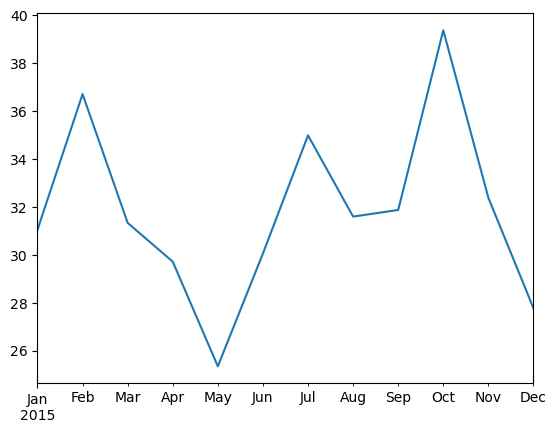

In [114]:
ts["prices"].resample("ME").mean().plot()